Question to work around: How do infrastructure projects like light rail, public transit, and schools influence housing, home prices, and the population in surrounding areas?

## Case Study: King County

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Set global figure size
plt.rcParams['figure.figsize'] = [10, 6]

# Set font sizes
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

plt.rcParams['figure.autolayout'] = True

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

import plotly.io as pio

pio.templates.default = "plotly_white"

plt.rcParams['text.usetex'] = True

# Color palettes

custom_palette = sns.color_palette('Set2')
sns.set_palette(custom_palette)

from cycler import cycler

# Define a custom color cycle
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

# Fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
housing_data = pd.read_csv("datasets/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
print("Housing Data Loaded")
housing_data.sample(n=5)

Housing Data Loaded


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31
6176,121797,6515,The Palisades,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,346909.848513,...,1.263397e+06,1.275446e+06,1.285649e+06,1.289189e+06,1.285281e+06,1.281820e+06,1.284254e+06,1.288823e+06,1.291590e+06,1.293088e+06
13077,180317,14929,Bedford,neighborhood,NC,NC,Greenville,"Greenville, NC",Pitt County,NaN,...,5.704619e+05,5.739974e+05,5.769529e+05,5.781906e+05,5.784916e+05,5.787806e+05,5.800466e+05,5.829729e+05,5.866472e+05,5.911531e+05
5139,272969,5398,Bixby Knolls,neighborhood,CA,CA,Long Beach,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,283424.252048,...,1.180729e+06,1.180940e+06,1.185720e+06,1.190644e+06,1.199321e+06,1.210286e+06,1.220973e+06,1.226508e+06,1.230676e+06,1.238024e+06
14269,819092,16467,Naperville Historic District,neighborhood,IL,IL,Naperville,"Chicago-Naperville-Elgin, IL-IN-WI",DuPage County,NaN,...,7.417881e+05,7.480937e+05,7.533246e+05,7.567598e+05,7.598060e+05,7.640420e+05,7.702523e+05,7.757811e+05,7.789004e+05,7.807048e+05
3961,403298,4147,Goose Island,neighborhood,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,214557.209393,...,4.038224e+05,4.053804e+05,4.050511e+05,4.040255e+05,4.036007e+05,4.033076e+05,4.017683e+05,3.993663e+05,3.982667e+05,3.989176e+05


In [4]:
schools_geo = gpd.read_file("datasets/School_Sites_in_King_County___schsite_point.geojson")
print("School Sites Data Loaded")
schools_geo.sample(n=5)

School Sites Data Loaded


,OBJECTID,FEATURE_ID,ESITE,CODE,FEATUREDES,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,OSPI_CODE,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR,geometry
361,362,268,110,660,School-Elementary,Woodmoor Elementary School,Woodmoor,12225 NE 160th St,98011,-122.176033,47.741950,4377.0,10,NORTHSHORE,1626059011,162605,9011,POINT (-122.17603 47.74195)
425,426,265,111,660,School-Elementary,Westhill Elementary School,Westhill,19515 88th Ave NE,98011,-122.224472,47.770325,3287.0,10,NORTHSHORE,0626059012,062605,9012,POINT (-122.22447 47.77033)
71,72,6600429,473560,665,School-Other Facility,John Stanford Center (Administration),John Stanford Center,230 S Lander St,98134,-122.331372,47.580464,0.0,10,SEATTLE,7666205235,766620,5235,POINT (-122.33137 47.58047)
246,247,260,109,661,School-Junior High/Middle,Northshore Middle School,Northshore,12101 NE 160th St,98011,-122.179812,47.743150,4021.0,10,NORTHSHORE,1626059131,162605,9131,POINT (-122.17981 47.74315)
583,584,152,988985,664,School-Alternative,St. Thomas School,St. Thomas,8300 NE 12th St,98039,-122.229822,47.621413,0.0,20,BELLEVUE,2525049106,252504,9106,POINT (-122.22982 47.62142)


In [5]:
transit_routes = gpd.read_file("datasets/Transit_Routes_for_King_County_Metro___transitroute_line.geojson")
print("Transit Routes Data Loaded")
transit_routes.sample(n=5)

Transit Routes Data Loaded


,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,CURRENT_NEXT_CODE,IN_SERVICE_FLAG,ROUTE_ID,LOCAL_EXPRESS_CODE,ROUTE_NUM,SHAPE_Length,geometry
135,136,157,3,IN SERVICE,Y,102699,L,629,159679.128721,"MULTILINESTRING ((-121.79545 47.48991, -121.79..."
113,114,157,3,IN SERVICE,Y,100511,E,542,135096.887133,"MULTILINESTRING ((-122.30440 47.64455, -122.30..."
46,47,157,3,IN SERVICE,Y,100136,L,245,122851.120092,"MULTILINESTRING ((-122.16944 47.57195, -122.16..."
14,15,157,3,IN SERVICE,Y,100009,L,11,33540.618256,"MULTILINESTRING ((-122.32680 47.61522, -122.32..."
3,4,157,3,IN SERVICE,Y,100203,L,346,30953.167096,"MULTILINESTRING ((-122.32356 47.73652, -122.32..."


In [6]:
transit_stops = gpd.read_file("datasets/Transit_Stops_for_King_County_Metro___transitstop_point.geojson")
print("Transit Stops Data Loaded")
transit_stops.sample(n=5)

Transit Stops Data Loaded


,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,ACCESSIBILITY_DECAL,ACCESSORY_SIGN,STOP_ID,TRANS_LINK_ID,STOP_STATUS,STOP_TYPE,AUTH_CODE,...,ROUTESIGN,ROUTESIGN_OWNER,SIGN_MOUNTING_DIR,SIGNPOST,SIGNPOST_ANCHOR,SCHEDULE_HOLDER,NUM_SHELTERS,GISOBJID,DISPLACEMENT,geometry
23606,23607,157,1,YES,None,81432,262374,ACT,REG,KC,...,A1 <=2 rts,KCM,Away,2in metal,Unknown,None,0,8540.0,2392.4,POINT (-122.18180 47.74384)
14593,14594,157,0,YES,None,62081,36861,ACT,REG,DOT,...,A1 <=2 rts,KCM,Toward,2in metal,Base plate,None,0,100000863.0,5037.0,POINT (-122.02173 47.36145)
1602,1603,157,1,NO,None,57570,312913,ACT,REG,KC,...,A1 <=2 rts,KCM,Toward,2in metal,Cncrt-earth,None,0,5113.0,1286.7,POINT (-122.11637 47.48789)
7363,7364,157,0,UNK,None,78508,133169,CLO,REG,KEN,...,Unknown,KCM,Away,2in metal,Unknown,None,0,NaN,7001.1,POINT (-122.25349 47.77468)
3752,3753,157,1,YES,None,58410,27669,ACT,REG,AUB,...,A1 <=2 rts,KCM,Toward,2in metal,Base plate,None,0,5300.0,50.0,POINT (-122.21614 47.29085)


In [7]:
census_tracts = gpd.read_file("datasets/census/tract20/tract20.shp")
print("Census Tracts Data Loaded")
census_tracts.sample(n=5)

Census Tracts Data Loaded


,STATEFP,COUNTYFP,COUNTYNAME,TRACTCE,GEOID20,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,ALANDMI,AWATERMI,INTPTLAT,INTPTLON,XCOORD,YCOORD,geometry
1559,53,063,Spokane,013700,53063013700,137,Census Tract,G5020,S,70970534,627123,27.40188,0.24213,47.660772,-117.525426,2.374426e+06,864076.756130,"POLYGON ((2363786.616 837792.007, 2363811.329 ..."
1083,53,053,Pierce,071207,53053071207,712.07,Census Tract,G5020,S,4852543,38129,1.87358,0.01472,47.160992,-122.281373,1.197826e+06,669934.013369,"POLYGON ((1193443.540 671809.008, 1193487.077 ..."
1449,53,063,Spokane,001000,53063001000,10,Census Tract,G5020,S,3793745,97630,1.46477,0.03770,47.696828,-117.473958,2.387626e+06,874299.664485,"POLYGON ((2380843.789 876653.837, 2381083.338 ..."
1433,53,061,Snohomish,053802,53061053802,538.02,Census Tract,G5020,S,22505115,14961,8.68927,0.00578,47.862844,-121.828737,1.313993e+06,926845.627779,"POLYGON ((1303003.050 924465.481, 1303040.559 ..."
1493,53,063,Spokane,010204,53063010204,102.04,Census Tract,G5020,S,131866499,0,50.91394,0.00000,47.811436,-117.230343,2.443737e+06,920424.076247,"POLYGON ((2426025.443 908277.543, 2426024.763 ..."


In [8]:
demographics = pd.read_csv("datasets/census/productDownload_2025-01-19T210140/ACSDP5Y2020.DP05-Data.csv")
print("Demographics Data Loaded")
demographics.sample(n=5)

Demographics Data Loaded


,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
365,1400000US53033029702,"Census Tract 297.02, King County, Washington",2891,456,1421,329,1470,225,96.7,22.8,...,1.5,(X),(X),1971,(X),51.6,7.3,48.4,7.3,NaN
405,1400000US53033030902,"Census Tract 309.02, King County, Washington",6128,406,2808,428,3320,411,84.6,20.9,...,4.1,(X),(X),4064,(X),41.5,6.5,58.5,6.5,NaN
36,1400000US53033002900,"Census Tract 29, King County, Washington",4744,520,2310,329,2434,270,94.9,12.3,...,3.6,(X),(X),3679,(X),48.1,4.1,51.9,4.1,NaN
304,1400000US53033026400,"Census Tract 264, King County, Washington",6263,955,3134,537,3129,549,100.2,16.7,...,2.6,(X),(X),3553,(X),51.8,6.1,48.2,6.1,NaN


In [9]:
# Filter for King County data
housing_data = housing_data[housing_data["CountyName"] == "King County"]

# Drop unnecessary columns
columns_to_keep = ["RegionName", "CountyName"] + list(housing_data.columns[10:])
housing_data = housing_data[columns_to_keep]

# Reshape the data to long format
housing_data = pd.melt(housing_data, id_vars=["RegionName", "CountyName"],
                       var_name="Date", value_name="MedianPrice")

housing_data["Date"] = pd.to_datetime(housing_data["Date"])

print("Cleaned Housing Data:")
housing_data.sample(n=5)

Cleaned Housing Data:


,RegionName,CountyName,Date,MedianPrice
75181,Heather Downs,King County,2021-12-31,575442.459756
26058,Kingsgate,King County,2007-09-30,433460.287089
83252,Beacon Hill,King County,2024-05-31,722833.344769
65182,Shamrock Heights,King County,2019-01-31,741186.755655
25576,Meadowbrook,King County,2007-07-31,458330.960343


In [10]:
print("Transit Routes CRS:", transit_routes.crs)
print("Transit Stops CRS:", transit_stops.crs)

if transit_routes.crs != "EPSG:4326":
    transit_routes = transit_routes.to_crs(epsg=4326)

if transit_stops.crs != "EPSG:4326":
    transit_stops = transit_stops.to_crs(epsg=4326)

if census_tracts.crs != "EPSG:4326":
    census_tracts = census_tracts.to_crs(epsg=4326)
# Standardize demographics
demographics = demographics.rename(
    columns={"GEO_ID": "CensusTract", "DP05_0001E": "Population", "DP05_0002E": "MedianAge"})
demographics["CensusTract"] = demographics["CensusTract"].str[-6:]  # Extract tract ID

print("Cleaned Demographics Data:")
demographics.sample(n=5)

Transit Routes CRS: EPSG:4326
Transit Stops CRS: EPSG:4326
Cleaned Demographics Data:


,CensusTract,NAME,Population,DP05_0001M,MedianAge,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
91,006701,"Census Tract 67.01, King County, Washington",3109,654,1845,486,1264,403,146.0,58.3,...,1.2,(X),(X),1627,(X),62.7,16.2,37.3,16.2,NaN
169,011500,"Census Tract 115, King County, Washington",4464,418,1966,195,2498,353,78.7,13.2,...,2.6,(X),(X),3553,(X),43.2,3.8,56.8,3.8,NaN
129,008700,"Census Tract 87, King County, Washington",4599,638,2631,458,1968,308,133.7,24.9,...,3.4,(X),(X),3809,(X),53.3,5.3,46.7,5.3,NaN
153,010501,"Census Tract 105.01, King County, Washington",3948,484,1724,306,2224,403,77.5,20.8,...,5.4,(X),(X),3080,(X),44.2,8.1,55.8,8.1,NaN
417,031501,"Census Tract 315.01, King County, Washington",3967,424,1854,258,2113,288,87.7,15.2,...,4.4,(X),(X),3122,(X),46.7,4.4,53.3,4.4,NaN


In [12]:
zillow_neighborhoods = gpd.read_file("datasets/Zillow_Neighborhoods/ZillowNeighborhoods.gdb")

zillow_neighborhoods = zillow_neighborhoods[zillow_neighborhoods["County"] == "King"]
zillow_neighborhoods = zillow_neighborhoods.to_crs(
    epsg=32610)  # Project to UTM Zone 10N for accurate distance calculations

housing_geo = zillow_neighborhoods.merge(housing_data, left_on="Name", right_on="RegionName", how="inner")

transit_stops = transit_stops.to_crs(epsg=32610)

In [16]:
# Define distance categories
distance_categories = {
    "Easily Walkable (0.5 mile)": 804.5,  # 0.5 mile in meters
    "Accessible (1 mile)": 1609,  # 1 mile in meters
    "Out of Range (\>1 mile)": None  # Beyond 1 mile
}

# Assign proximity categories
housing_geo["ProximityCategory"] = "Out of Range (>1 mile)"
for category, distance in distance_categories.items():
    if distance is not None:
        # Generate buffer for this category
        transit_stops[f"{category}_buffer"] = transit_stops.geometry.buffer(distance)
        # Identify neighborhoods within the buffer
        in_buffer = gpd.sjoin(
            housing_geo,
            transit_stops.set_geometry(f"{category}_buffer"),
            how="inner",
            predicate="within"
        )["Name"].unique()
        # Assign category
        housing_geo.loc[housing_geo["Name"].isin(in_buffer), "ProximityCategory"] = category

['Riverview' 'Mill Creek' 'Saltair Hills' 'LaCrosse' 'Lakeview' 'Winsper'
 'Springtree' 'Honey Creek Park' 'Pioneer Place' 'Maple Ridge Estates'
 'Orchards' 'Vineyards' 'Windsong' 'South Union' 'Leisure Estates'
 'North Renton' 'Maplewood Glen' 'Highbury Park' 'Shamrock Heights'
 'Windwood' 'Victoria Park' 'Portage Bay' 'Falcon Ridge' 'Shadow Hawk'
 'Tiffany Park' 'Downtown' 'Pioneer Square' 'Denny Triangle'
 'Denny - Blaine' 'Maplewood' 'Rolling Hills' 'Summerfield'
 'Heather Downs' 'One Union Place' 'Enatai' 'First Hill' 'Judkins Park'
 'Jackson Place' 'Renton Park' 'Chinquapin Ridge' 'Woodbury Lane'
 'Crown Hill' 'International District' 'Marina District']
['Riverview' 'Lake Meridian' 'West Hill' 'Mill Creek' 'Providence Point'
 'Montreux' 'Market-Downtown' 'The Lakes' 'Everest' 'Moss Bay' 'Highlands'
 'Lake View' 'Saltair Hills' 'South Des Moines' 'Zenith' 'Houghton'
 'South Rose Hill' 'LaCrosse' 'Honey Creek Park' 'Honey Creek Ridge'
 'Stonegate' 'VerCello' 'Summerwind' 'Springtre

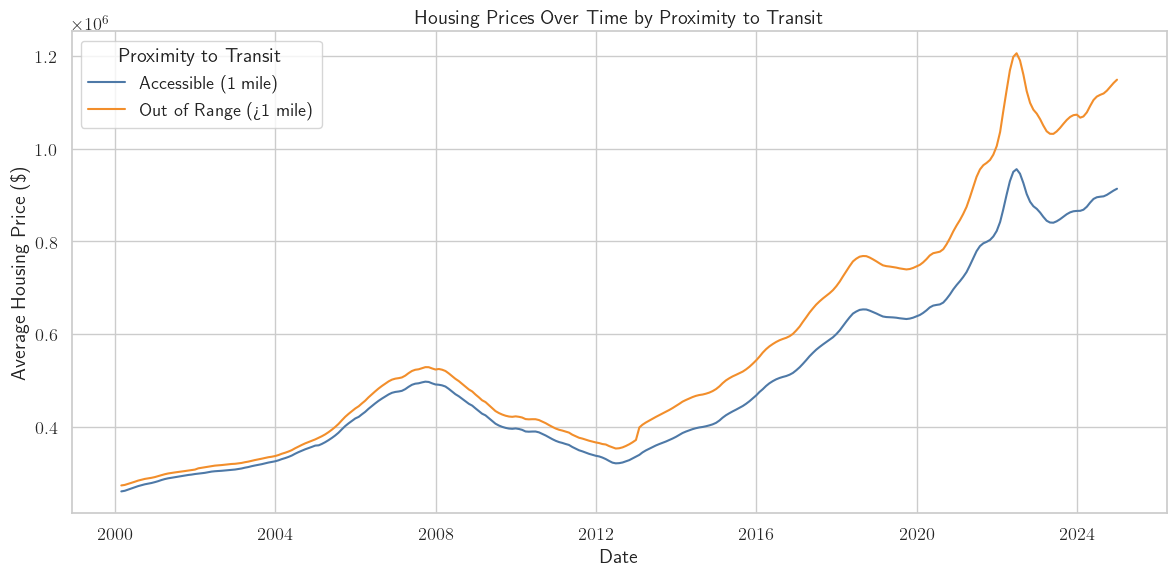

ProximityCategory
Accessible (1 mile)       64285
Out of Range (>1 mile)    25116
Name: count, dtype: int64

In [29]:
# Group data by proximity category and date to compute average housing prices
housing_prices_categories = housing_geo.groupby(
    ["Date", "ProximityCategory"]
)["MedianPrice"].mean().reset_index()

# Plot housing price trends for each proximity category
plt.figure(figsize=(12, 6))
for category, data in housing_prices_categories.groupby("ProximityCategory"):
    plt.plot(data["Date"], data["MedianPrice"], label=category)

plt.title("Housing Prices Over Time by Proximity to Transit")
plt.xlabel("Date")
plt.ylabel("Average Housing Price (\$)")
plt.legend(title="Proximity to Transit")
plt.grid(True)

# Save the plot as an image
plt.savefig("./visualizations/housing_prices_by_proximity_to_transit.png", dpi=300)
plt.show()

# Save the categorization for analysis
housing_geo["ProximityCategory"].value_counts()
